# Importing Libraries and dataset

In [ ]:
#Importibg libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#importing drive
from google.colab import drive

In [ ]:
#mounting drivw
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#importing the dataset
titanic_data_test=pd.read_csv('gdrive/My Drive/project/titanic/test.csv')
titanic_data_train=pd.read_csv('gdrive/My Drive/project/titanic/train.csv')
train_data=titanic_data_train

# Data EDA

In [ ]:
titanic_data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h1> Data Discription :</h1><br>
<h3>Survived: Dead/Alive <br>
PassengerId: Unique Id of a passenger.<br>
pclass: Ticket class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
sex: Sex<br>
Age: Age in years<br>
sibsp:  Number of siblings / spouses aboard the Titanic<br>
parch: Number  of parents / children aboard the Titanic<br>
ticket: Ticket number<br>
fare: Passenger fare (British pound)<br>
cabin: Cabin number<br>
embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
titanic_data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ploting To Determine Wheater Age and Gender Has Impact On Servival

Text(0.5, 1.0, 'FEMALE')

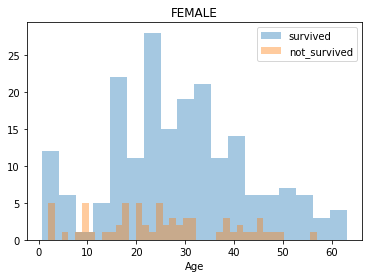

In [ ]:

female= titanic_data_train[titanic_data_train['Sex']=='female']

plot_fig=sns.distplot(female[female['Survived']==1].Age.dropna(),bins=18,label='survived',kde=False)
plot_fig=sns.distplot(female[female['Survived']==0].Age.dropna(),bins=40,label='not_survived', kde=False)
plot_fig.legend()
plot_fig.set_title('FEMALE')



We Can see Female of Age between nearly 15 to 40 has highr probabilty of Surviving

Ploting to Determing Survival Of Male According to Age

Text(0.5, 1.0, 'MALE')

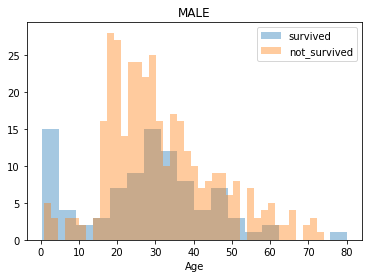

In [ ]:


male=titanic_data_train[titanic_data_train['Sex']=='male']

plot_fig=sns.distplot(male[male['Survived']==1].Age.dropna(),bins=18,label='survived',kde=False)

plot_fig=sns.distplot(male[male['Survived']==0].Age.dropna(),bins=40,label='not_survived',kde=False)
plot_fig.legend()
plot_fig.set_title('MALE')


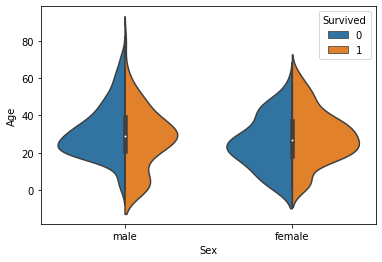

In [ ]:
sns.violinplot(x='Sex', y='Age', data=train_data, hue='Survived', split=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2971: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


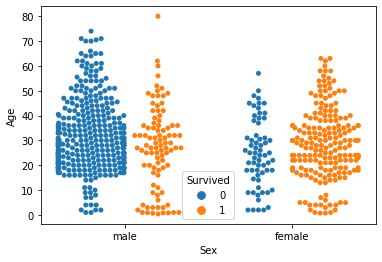

In [ ]:
sns.swarmplot(x='Sex', y='Age', data=train_data, hue='Survived', split=True)

It is Seen That Male from age 0 to 5 and 20 to 35 has higher probability of surviving

Plotting Bar Graph to Determine Which gender has higher probability to survive

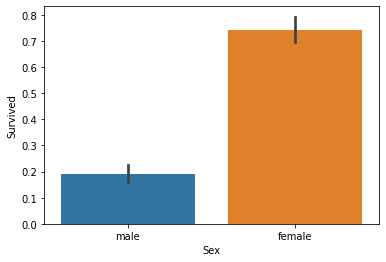

In [ ]:
sns.barplot(titanic_data_train['Sex'],titanic_data_train['Survived'])

Plotting Bar Graph to deterine which Class has higher probability to survive

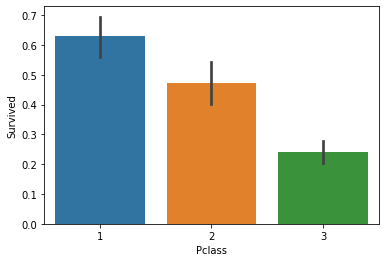

In [ ]:
sns.barplot(titanic_data_train['Pclass'],titanic_data_train['Survived'])

In [ ]:
titanic_data_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Determing Weather people are alone are not and weather or not being alone has an impact on survival 
<br>Also SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic.

In [ ]:
data = [titanic_data_test, titanic_data_train]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
titanic_data_train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


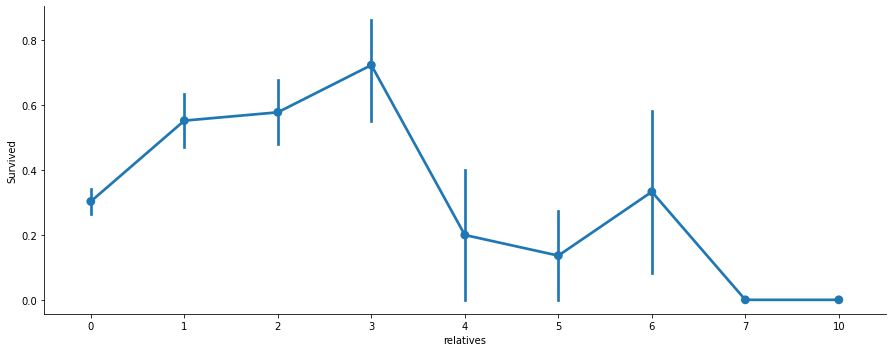

In [ ]:
axes = sns.factorplot('relatives','Survived', 
                      data=titanic_data_train, aspect = 2.5, )

It is seen That people having relation Number 3 has high probability to Survive

# Data Preprocessing
Removing Some unwanted touples that may not required for determining the Survival.

In [ ]:

titanic_data_train = titanic_data_train.drop(['PassengerId'], axis=1)

In [ ]:
titanic_data_test=titanic_data_test.drop(['Cabin'],axis=1)

In [ ]:
titanic_data_train=titanic_data_train.drop(['Cabin'],axis=1)

In [ ]:
titanic_data_test=titanic_data_test.drop(['Name'],axis=1)
titanic_data_train=titanic_data_train.drop(['Name'],axis=1)

In [ ]:
titanic_data_test=titanic_data_test.drop(['Ticket'],axis=1)
titanic_data_train=titanic_data_train.drop(['Ticket'],axis=1)

Filling The missing value of age using the mean and Deviation and the selecting a random value between them to fill the empty data

In [ ]:
data = [titanic_data_train, titanic_data_test]

for dataset in data:
    mean = titanic_data_train["Age"].mean()
    std = titanic_data_test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = titanic_data_train["Age"].astype(int)
titanic_data_train["Age"].isnull().sum()


0

Checking Weather the Age has any null values

Determing The Port of Embarkation

In [ ]:
titanic_data_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
#embarked
common_value = 'S'
data = [titanic_data_train, titanic_data_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
titanic_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    int64  
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   relatives  891 non-null    int64  
 9   not_alone  891 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 69.7+ KB


In [ ]:
titanic_data_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,male,22,1,0,7.2500,S,1,0
1,1,1,female,38,1,0,71.2833,C,1,0
2,1,3,female,26,0,0,7.9250,S,0,1
3,1,1,female,35,1,0,53.1000,S,1,0
4,0,3,male,35,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,0,1
887,1,1,female,19,0,0,30.0000,S,0,1
888,0,3,female,18,1,2,23.4500,S,3,0
889,1,1,male,26,0,0,30.0000,C,0,1


Converting The Port Of Embarkation in Numerics

In [ ]:
#convrting into numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [titanic_data_train,titanic_data_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

Converting The Fare in Int

In [ ]:
data = [titanic_data_train,titanic_data_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

Converting gender Into numerics

In [ ]:
genders = {"male": 0, "female": 1}
data = [titanic_data_train,titanic_data_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
titanic_data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,1,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,1,0
4,0,3,0,35,0,0,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13,0,0,1
887,1,1,1,19,0,0,30,0,0,1
888,0,3,1,18,1,2,23,0,3,0
889,1,1,0,26,0,0,30,1,0,1


Catagorizing The age into Groups that may determine the survival probability

In [ ]:
data = [titanic_data_train]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
    

In [ ]:
titanic_data_train['Age'].value_counts()

4    172
6    162
5    146
3    136
2    114
1     93
0     68
Name: Age, dtype: int64

In [ ]:
titanic_data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone
0,0,3,0,2,1,0,7,0,1,0
1,1,1,1,5,1,0,71,1,1,0
2,1,3,1,3,0,0,7,0,0,1
3,1,1,1,5,1,0,53,0,1,0
4,0,3,0,5,0,0,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,13,0,0,1
887,1,1,1,2,0,0,30,0,0,1
888,0,3,1,1,1,2,23,0,3,0
889,1,1,0,3,0,0,30,1,0,1


Categorizing The Fare may not require for survival

In [ ]:
data = [titanic_data_train,titanic_data_test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
titanic_data_train['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

<h1>

Creating a new Feature from Age and Pclass To determine the Age of the Person in Each Class

# Creating new Features
Creating new Features from Age and Pclass To determine the Age of the Person in Each Class

In [ ]:
data = [titanic_data_train,titanic_data_test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

Creating a new feature of Fear per Person

In [ ]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [ ]:
titanic_data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,6,0
1,1,1,1,5,1,0,3,1,1,0,5,1
2,1,3,1,3,0,0,0,0,0,1,9,0
3,1,1,1,5,1,0,3,0,1,0,5,1
4,0,3,0,5,0,0,1,0,0,1,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,3,0,0,1,0,0,1,6,1
887,1,1,1,2,0,0,2,0,0,1,2,2
888,0,3,1,1,1,2,2,0,3,0,3,0
889,1,1,0,3,0,0,2,1,0,1,3,2




---



# Creating The ML model using Decision Tree

In [ ]:
X_train = titanic_data_train.drop("Survived", axis=1)
Y_train = titanic_data_train["Survived"]
X_test  = titanic_data_test.drop("PassengerId", axis=1).copy()

Determining The accuracy of the model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train) 
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [ ]:
print("Training Accuracy:",acc_decision_tree)

Training Accuracy: 90.8


Filling The Survived Column to The test data set

In [ ]:
data=pd.DataFrame(Y_pred)

In [ ]:
data

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [ ]:
titanic_data_test['Survived']=data[0]

In [ ]:

titanic_data_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Age_Class,Fare_Per_Person,Survived
0,892,3,0,22,0,0,0,2,0,1,66,0,0
1,893,3,1,38,1,0,0,0,1,0,114,0,0
2,894,2,0,26,0,0,1,2,0,1,52,1,0
3,895,3,0,35,0,0,1,0,0,1,105,1,0
4,896,3,1,35,1,1,1,0,2,0,105,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,31,0,0,1,0,0,1,93,1,0
414,1306,1,1,44,0,0,4,1,0,1,44,4,1
415,1307,3,0,38,0,0,0,0,0,1,114,0,0
416,1308,3,0,34,0,0,1,0,0,1,102,1,0


# Visualizing The Test Data Set After Prediction of the survival of passengers.

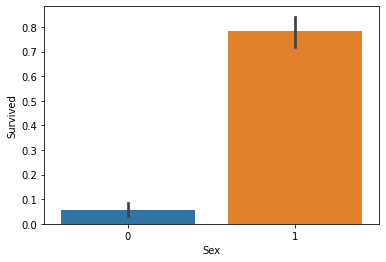

In [ ]:
sns.barplot(titanic_data_test['Sex'],titanic_data_test['Survived'])

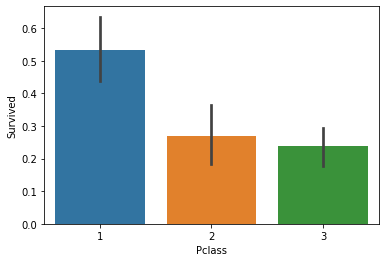

In [ ]:
sns.barplot(titanic_data_test['Pclass'],titanic_data_test['Survived'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2971: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


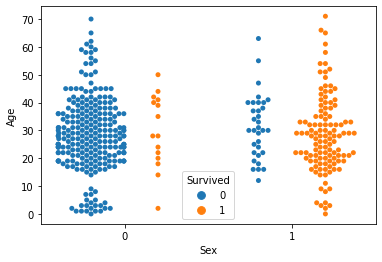

In [ ]:

sns.swarmplot(x='Sex', y='Age', data=titanic_data_test, hue='Survived', split=True)

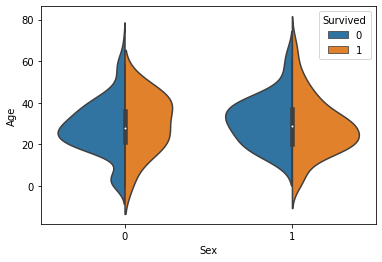

In [ ]:
sns.violinplot(x='Sex', y='Age', data=titanic_data_test, hue='Survived', split=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


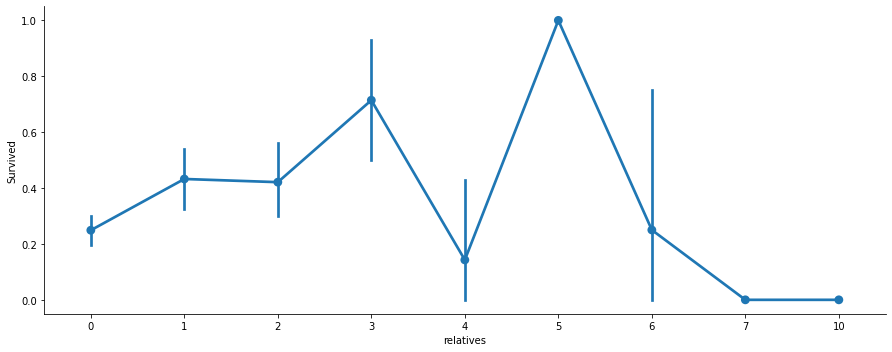

In [ ]:
axes = sns.factorplot('relatives','Survived', 
                      data=titanic_data_test, aspect = 2.5, )

# Conclusion

After anlysing the given data sets of Titanic I can say that the probabilty of survival of a person is totally dependent upon some key factores that are:

*   Gender
*   Age
*   Number of Relatives
*   Passanger Class



Although the number of relative is not the direct factor affecting the probability





